# Assignment Name : Bike Sharing

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

# Problem Statement:
A US bike-sharing provider BoomBikes is lokking forward for below problem statements to improve his service for a better profitable business in market
1. Which variables are significant in predicting the demand for shared bikes
2. How well those variables describe the bike demands

# Step 1 - Import all required packages and load the data set

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import numpy and pands packages

import numpy as np
import pandas as pd

In [3]:
# Import all visualization Librariries

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import dataset

ds = pd.read_csv('day.csv')
ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Step 2 - Start with EDA

In [5]:
# Data shape
ds.shape

(730, 16)

In [6]:
# Information of data
ds.info()
# All data type are properly described except dteday

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Check missing values
ds.isna().mean()
# There is no null entries in the dataset

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
# Check all unique levels of the attributes
ds.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [9]:
# derive a day column
ds['day'] = pd.DatetimeIndex(ds['dteday']).day

In [10]:
# Bin the month day with 3 different category
bins = [0, 10, 20, 32]
labels = [1,2,3]
ds['bin_day'] = pd.cut(ds['day'], bins=bins, labels=labels)

### 2.1 Conversion of categorical values

In [11]:
# Convert Season values
ds.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

# Convert Weathersit values
ds.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

# Convert Month values
ds.mnth = ds.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
# Convert Weekdays values
ds.weekday = ds.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,bin_day
0,1,01-01-2018,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985,1,1
1,2,02-01-2018,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801,1,1
2,3,03-01-2018,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,1
3,4,04-01-2018,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,1
4,5,05-01-2018,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,1


### 2.2 Data Cleanning

In [12]:
# Dropping instant as it represent the sequence and its not giving any information about the data.
ds.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have day, month and year columns to work with
ds.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both
ds.drop(['casual'], axis = 1, inplace = True)
ds.drop(['registered'], axis = 1, inplace = True)

In [13]:
# Final columns
ds.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day',
       'bin_day'],
      dtype='object')

In [14]:
# Create list of variable type columns
cont_cols = ['temp', 'atemp', 'hum', 'windspeed']
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'bin_day','day']
target = ['cnt']

### 2.3 Univariate Analysis

### 2.3.1 Univariate Analysis for Conteneous variable summary

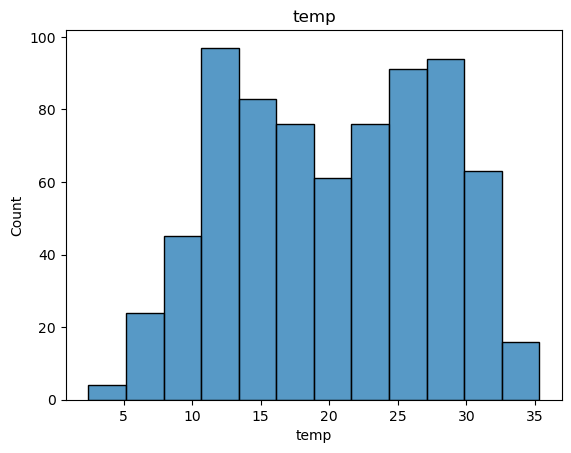

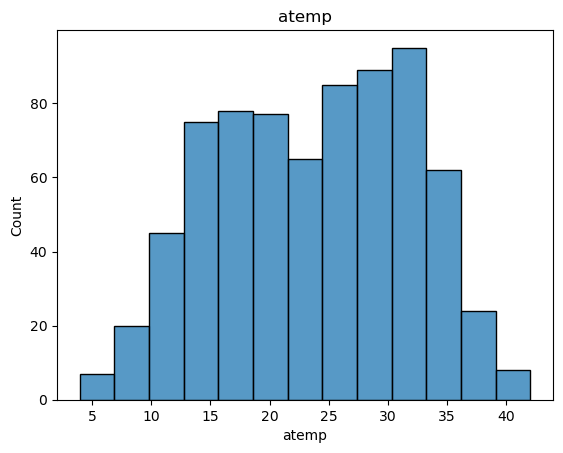

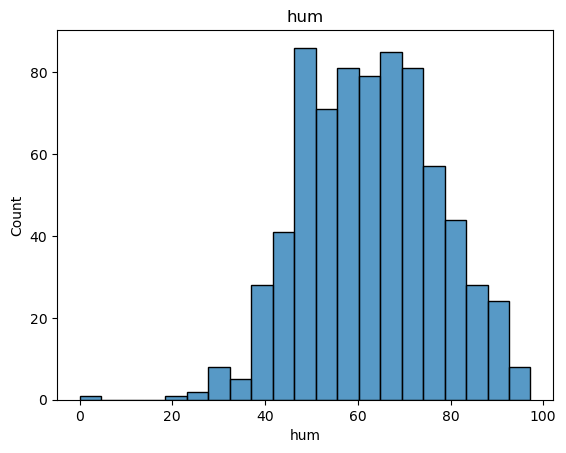

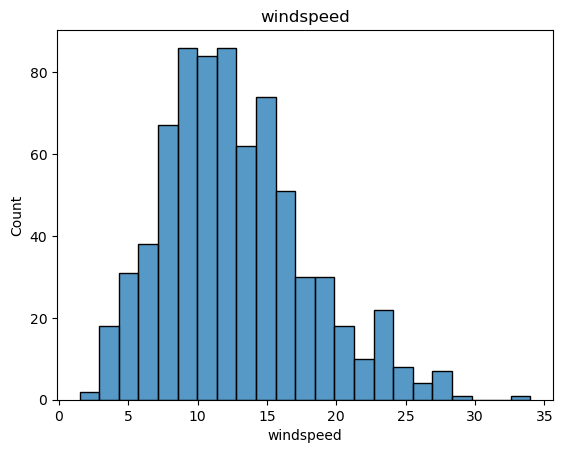

In [15]:
# Draw histplot for the conteneous columns

for col in cont_cols:
    sns.histplot(ds[col])
    plt.title(col)
    plt.show()

### Univariate Analysis for Conteneous variable summary
1. temp and atemp looks more similar
2. mostly the humidity is in between 50 to 75
3. mostly wind speed is between 5 to 20

### 2.3.2 Univariate Outlier Analysis for Conteneous variable

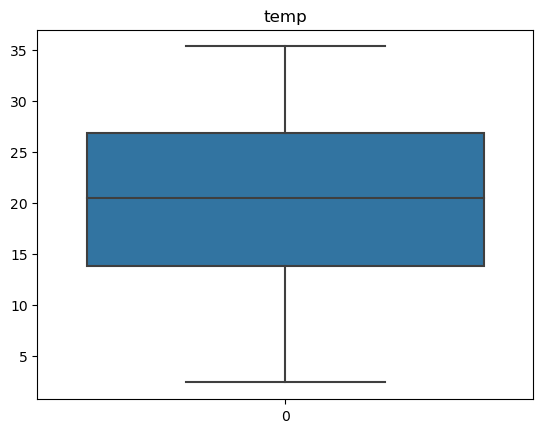

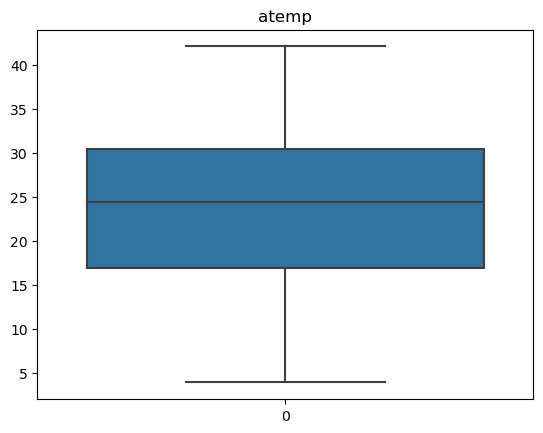

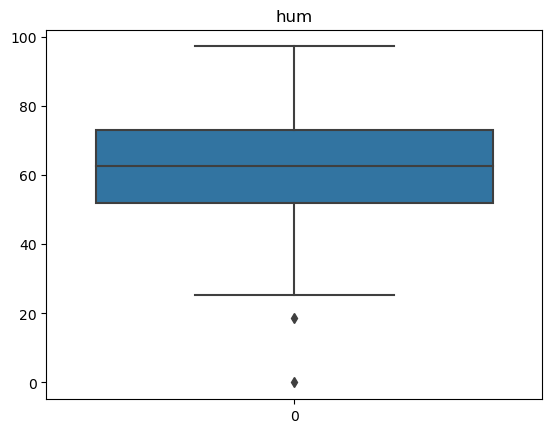

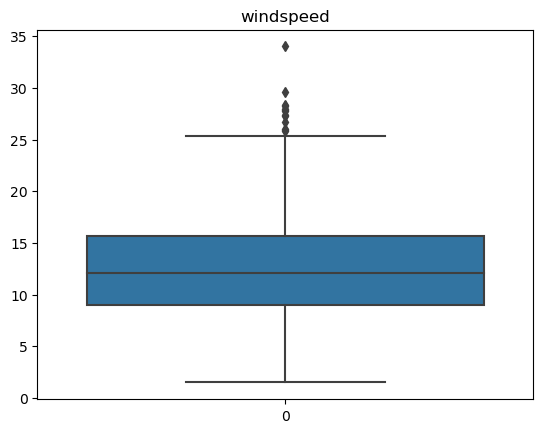

In [16]:
# Outlier analysis

for col in cont_cols:
    sns.boxplot(ds[col])
    plt.title(col)
    plt.show()

### Univariate Outlier Analysis for Conteneous variable summary
All coneneous variables looks fine with respect to data. There are ceratain outlier in Humidity and Wind speed but those are not impactful.

### 2.3.3 Categorical Univariate anlysis

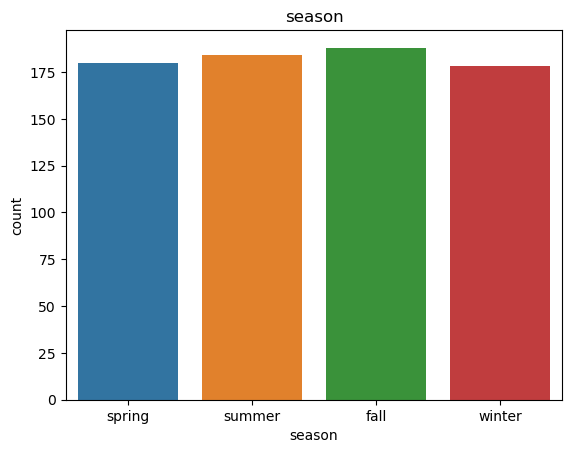

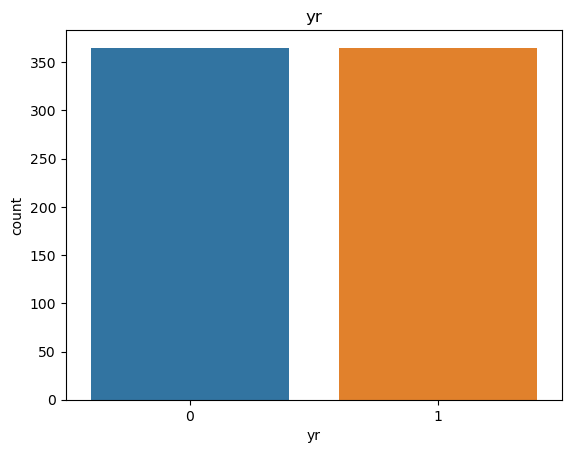

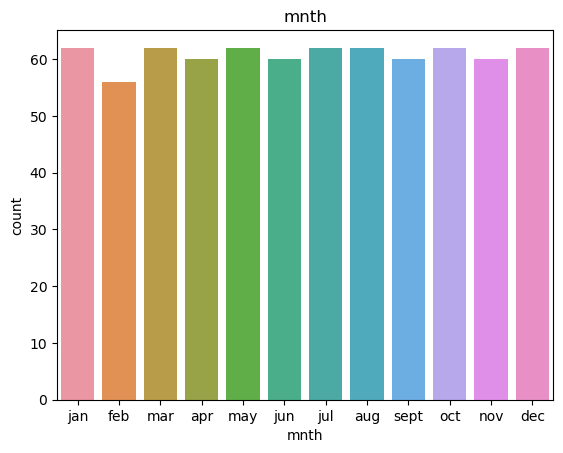

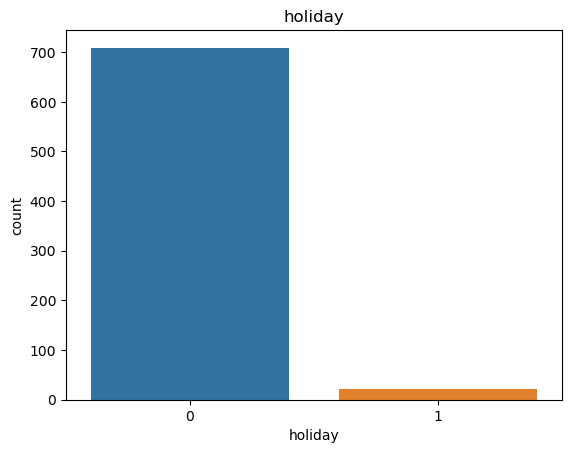

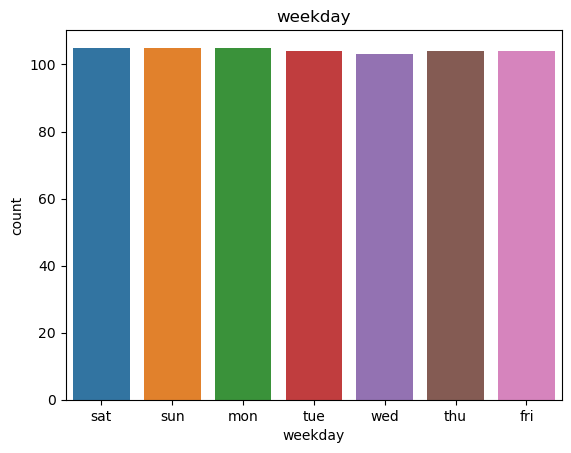

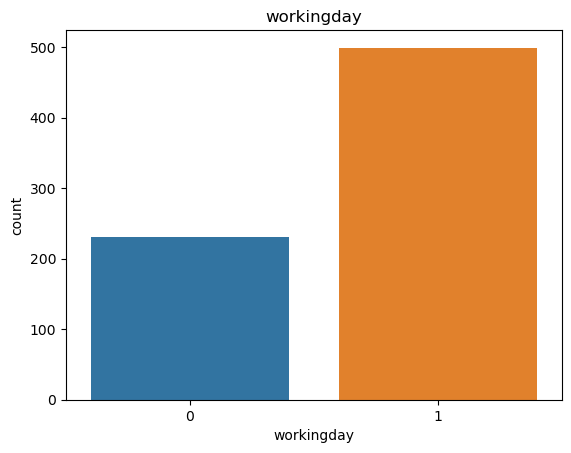

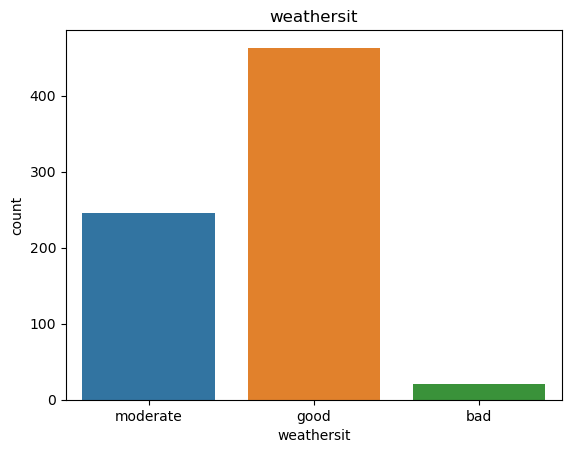

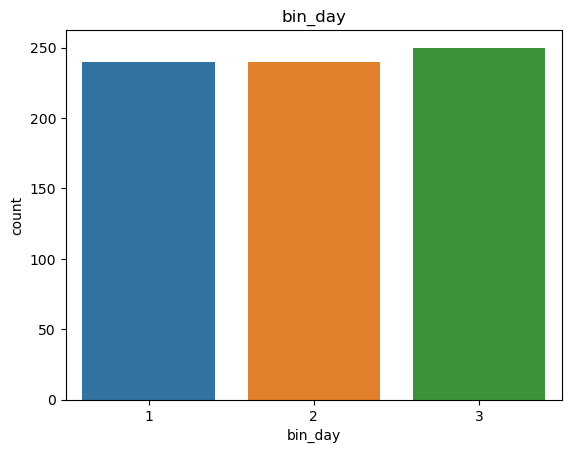

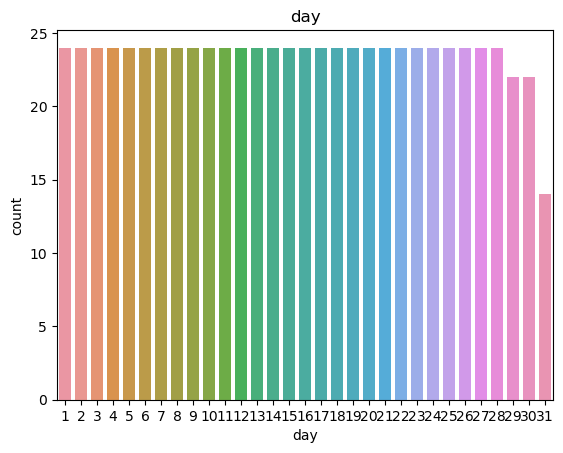

In [17]:
for col in cat_cols:
    sns.countplot(x=ds[col])
    plt.title(col)
    plt.show()

### Categorical Variable Analysis Summary
1. Bike sharing Frequency is more in fall season than other
2. For good and clear weather the frequecy is more
3. Holidays having low frequency of booking
4. Last 3 days of the month frequency drops w.r.t. other days of the month

### 2.4 Bivariate Analysis

### 2.4.1 Bivariate Analysis of conteneous variable

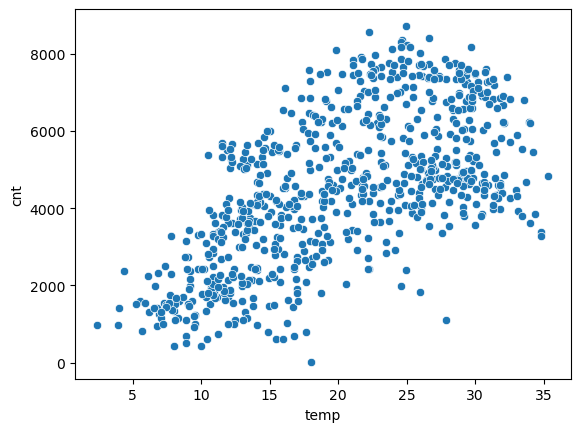

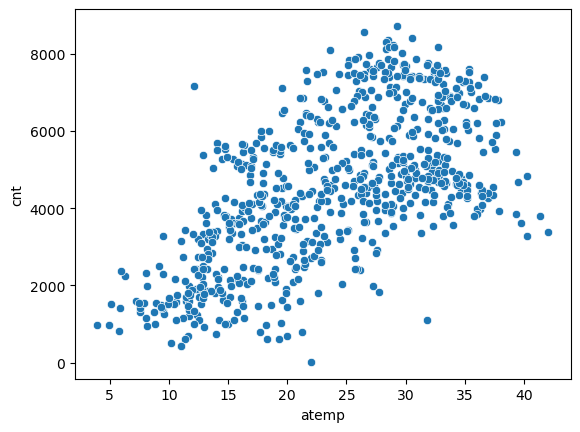

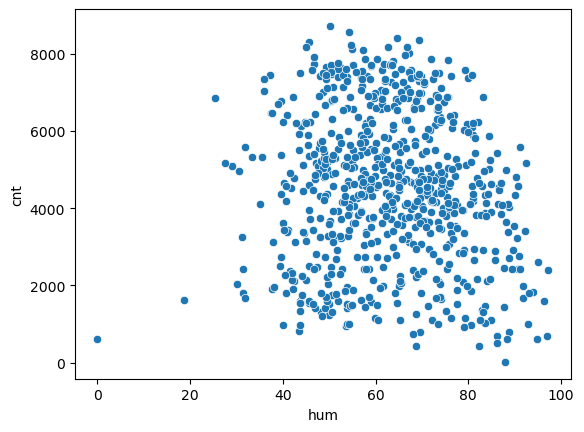

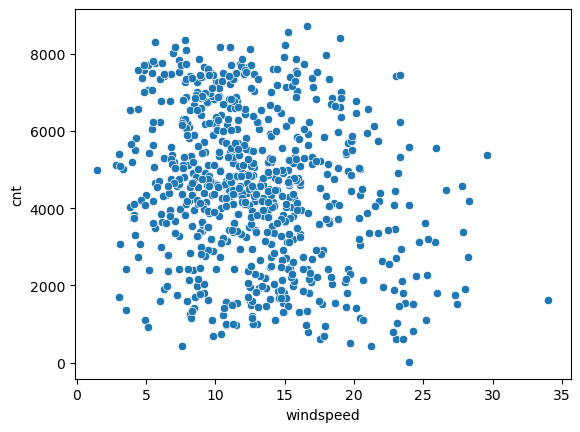

In [18]:
# Bivariate anlysis of all conteneous varibale with cnt
for i in cont_cols:
    sns.scatterplot(x=ds[i],y=ds["cnt"])
    plt.show()

### Bivariate analysis of conteneous variables with cnt
1. cnt increases with increase in temp and atemp, so there is a high linearity
2. cnt is also having positive corelation with humidity
3. cnt is also having negative corelation with wind speed

### 2.4.2 Bivariate Analysis with categorical variables

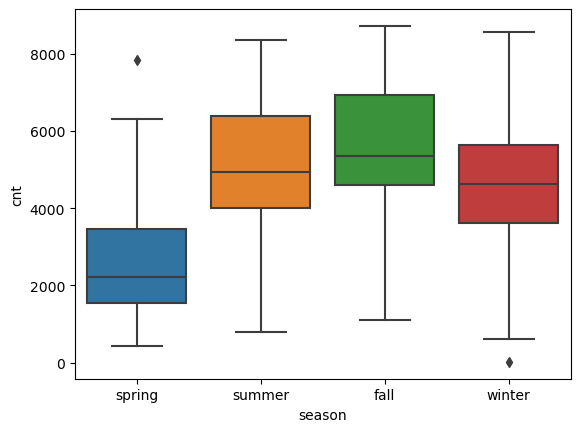

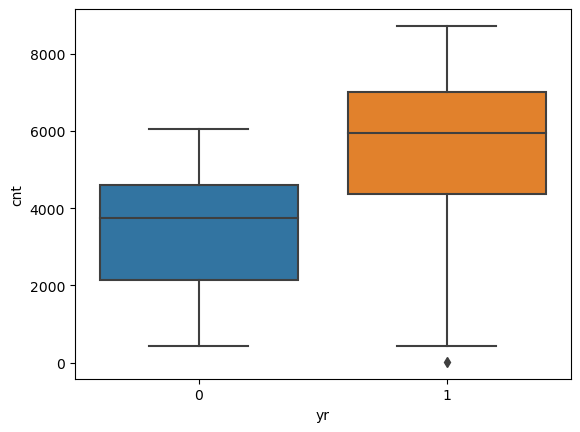

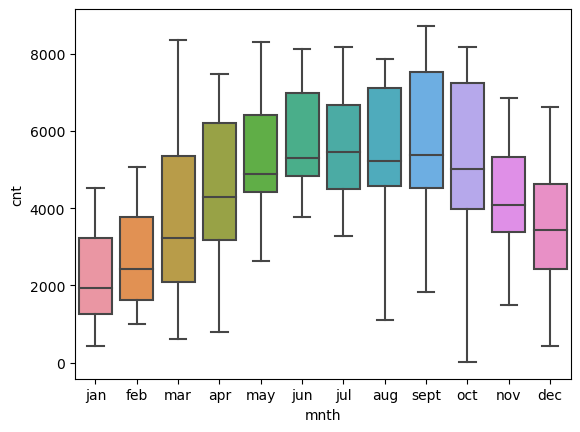

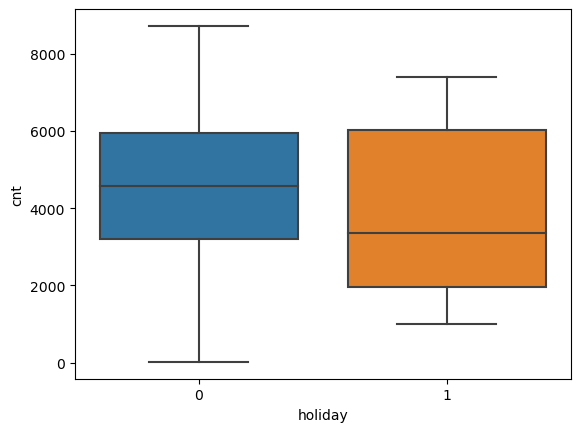

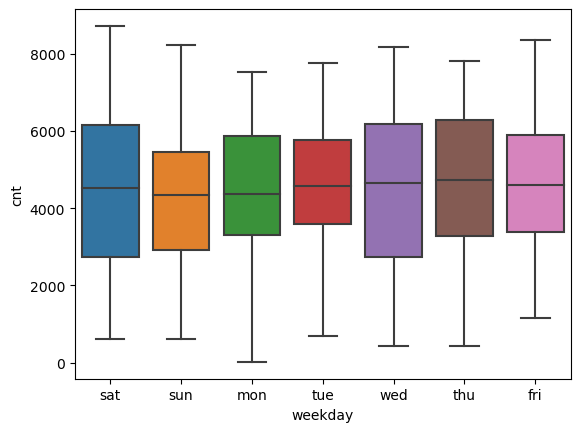

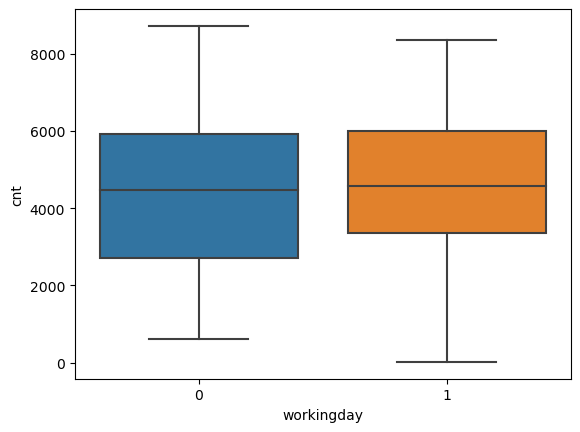

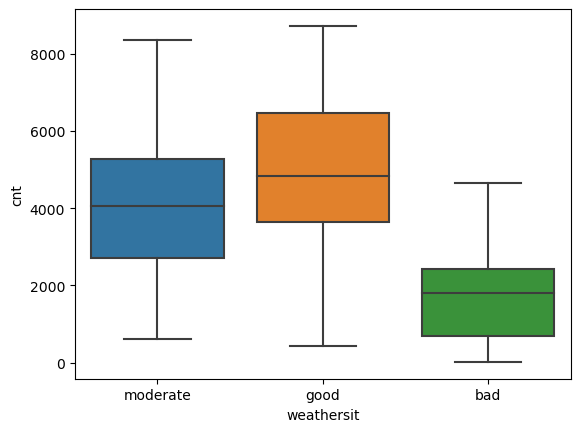

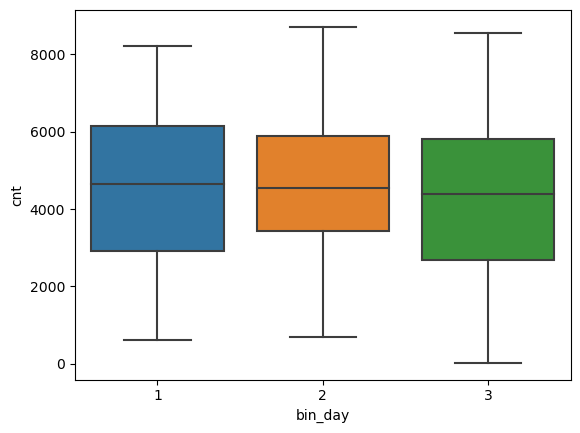

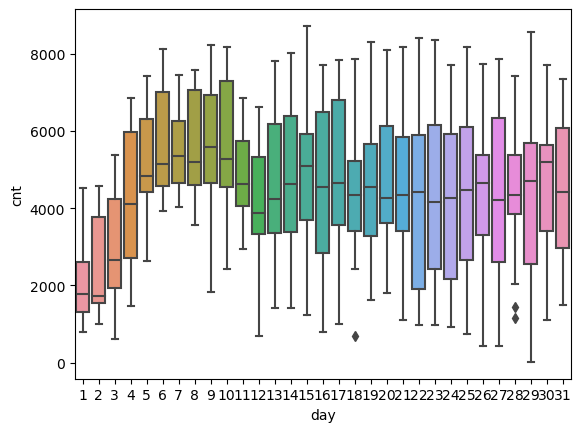

In [19]:
# Bivariate analysis of categorical variavles with cnt
for i in cat_cols:
    sns.boxplot(x=ds[i],y=ds["cnt"])
    plt.show()

### Categorical Bivariate Analysis 
1. Looks like Season 3 that is fall is having high demand of bike sharing
2. In year 2 the demand of the bike sharing increased significantly
3. Demand increased conteneously from Jan to Jun and it was highest in Sept then it gradually decreasing till Dec
4. First 10 days of the month demand is little high then slight low in 2nd and then 3rd 10 days of the month
5. Holidays demand is less
6. Demand increses slightly over 0 week day till 4th week day and then decrese slightly
7. On working days demand is slightly high
8. Weathersit category 1 is high demand of bike sharing than 2 and 3 

### 2.5 Multivariate

<Axes: >

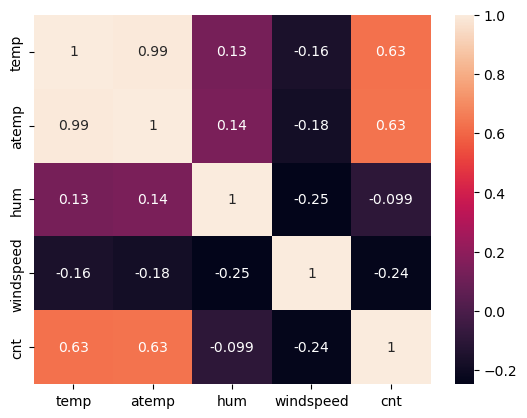

In [20]:
cont_cols.append("cnt")
sns.heatmap(ds[cont_cols].corr(),annot=True)

### Innercolinearity
1. temp and atemp are highly colinear with cnt. However they are also internally highly colinear.
   So either one column can be dropped
2. Both hum and windspeed negativly correlated with cnt

In [21]:
ds.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day',
       'bin_day'],
      dtype='object')

In [22]:
# Drop atemp as its highly inter colinear with temp and we will keep temp only
ds.drop(['atemp'], axis = 1, inplace = True)

In [23]:
# Drop day as we have created bin_day out of it
ds.drop(['day'], axis = 1, inplace = True)

In [24]:
# Final columns
ds.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'bin_day'],
      dtype='object')

In [25]:
ds.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
hum           594
windspeed     649
cnt           695
bin_day         3
dtype: int64

# Step 3 - Dummy Variable Creation

In [26]:
# Create dummy variable for season
season_dum = pd.get_dummies(ds["season"], drop_first=True, dtype=int)
season_dum.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [27]:
# Create dummy variable for weekday
wday_dum = pd.get_dummies(ds["weekday"], drop_first=True, dtype=int)
wday_dum.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [28]:
# Create dummy variable for weathersit
wsit_dum = pd.get_dummies(ds["weathersit"], drop_first=True, dtype=int)
wsit_dum.head()

,good,moderate
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [29]:
# Create dummy variable for bin_day
bindays_dum = pd.get_dummies(ds["bin_day"], drop_first=True, dtype=int)
bindays_dum.head()

,2,3
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [30]:
# Create dummy variable for month
mnth_dum = pd.get_dummies(ds["mnth"], drop_first=True, dtype=int)
mnth_dum.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [31]:
# Add dummy variables to dataset
final_ds = pd.concat([ds, season_dum, wday_dum, wsit_dum, bindays_dum, mnth_dum], axis=1)

In [32]:
# Drop old cat variables from data set
final_ds = final_ds.drop(['season', 'mnth', 'weekday', 'weathersit', 'bin_day'], axis=1)

In [33]:
final_ds.columns

Index([        'yr',    'holiday', 'workingday',       'temp',        'hum',
        'windspeed',        'cnt',     'spring',     'summer',     'winter',
              'mon',        'sat',        'sun',        'thu',        'tue',
              'wed',       'good',   'moderate',            2,            3,
              'aug',        'dec',        'feb',        'jan',        'jul',
              'jun',        'mar',        'may',        'nov',        'oct',
             'sept'],
      dtype='object')

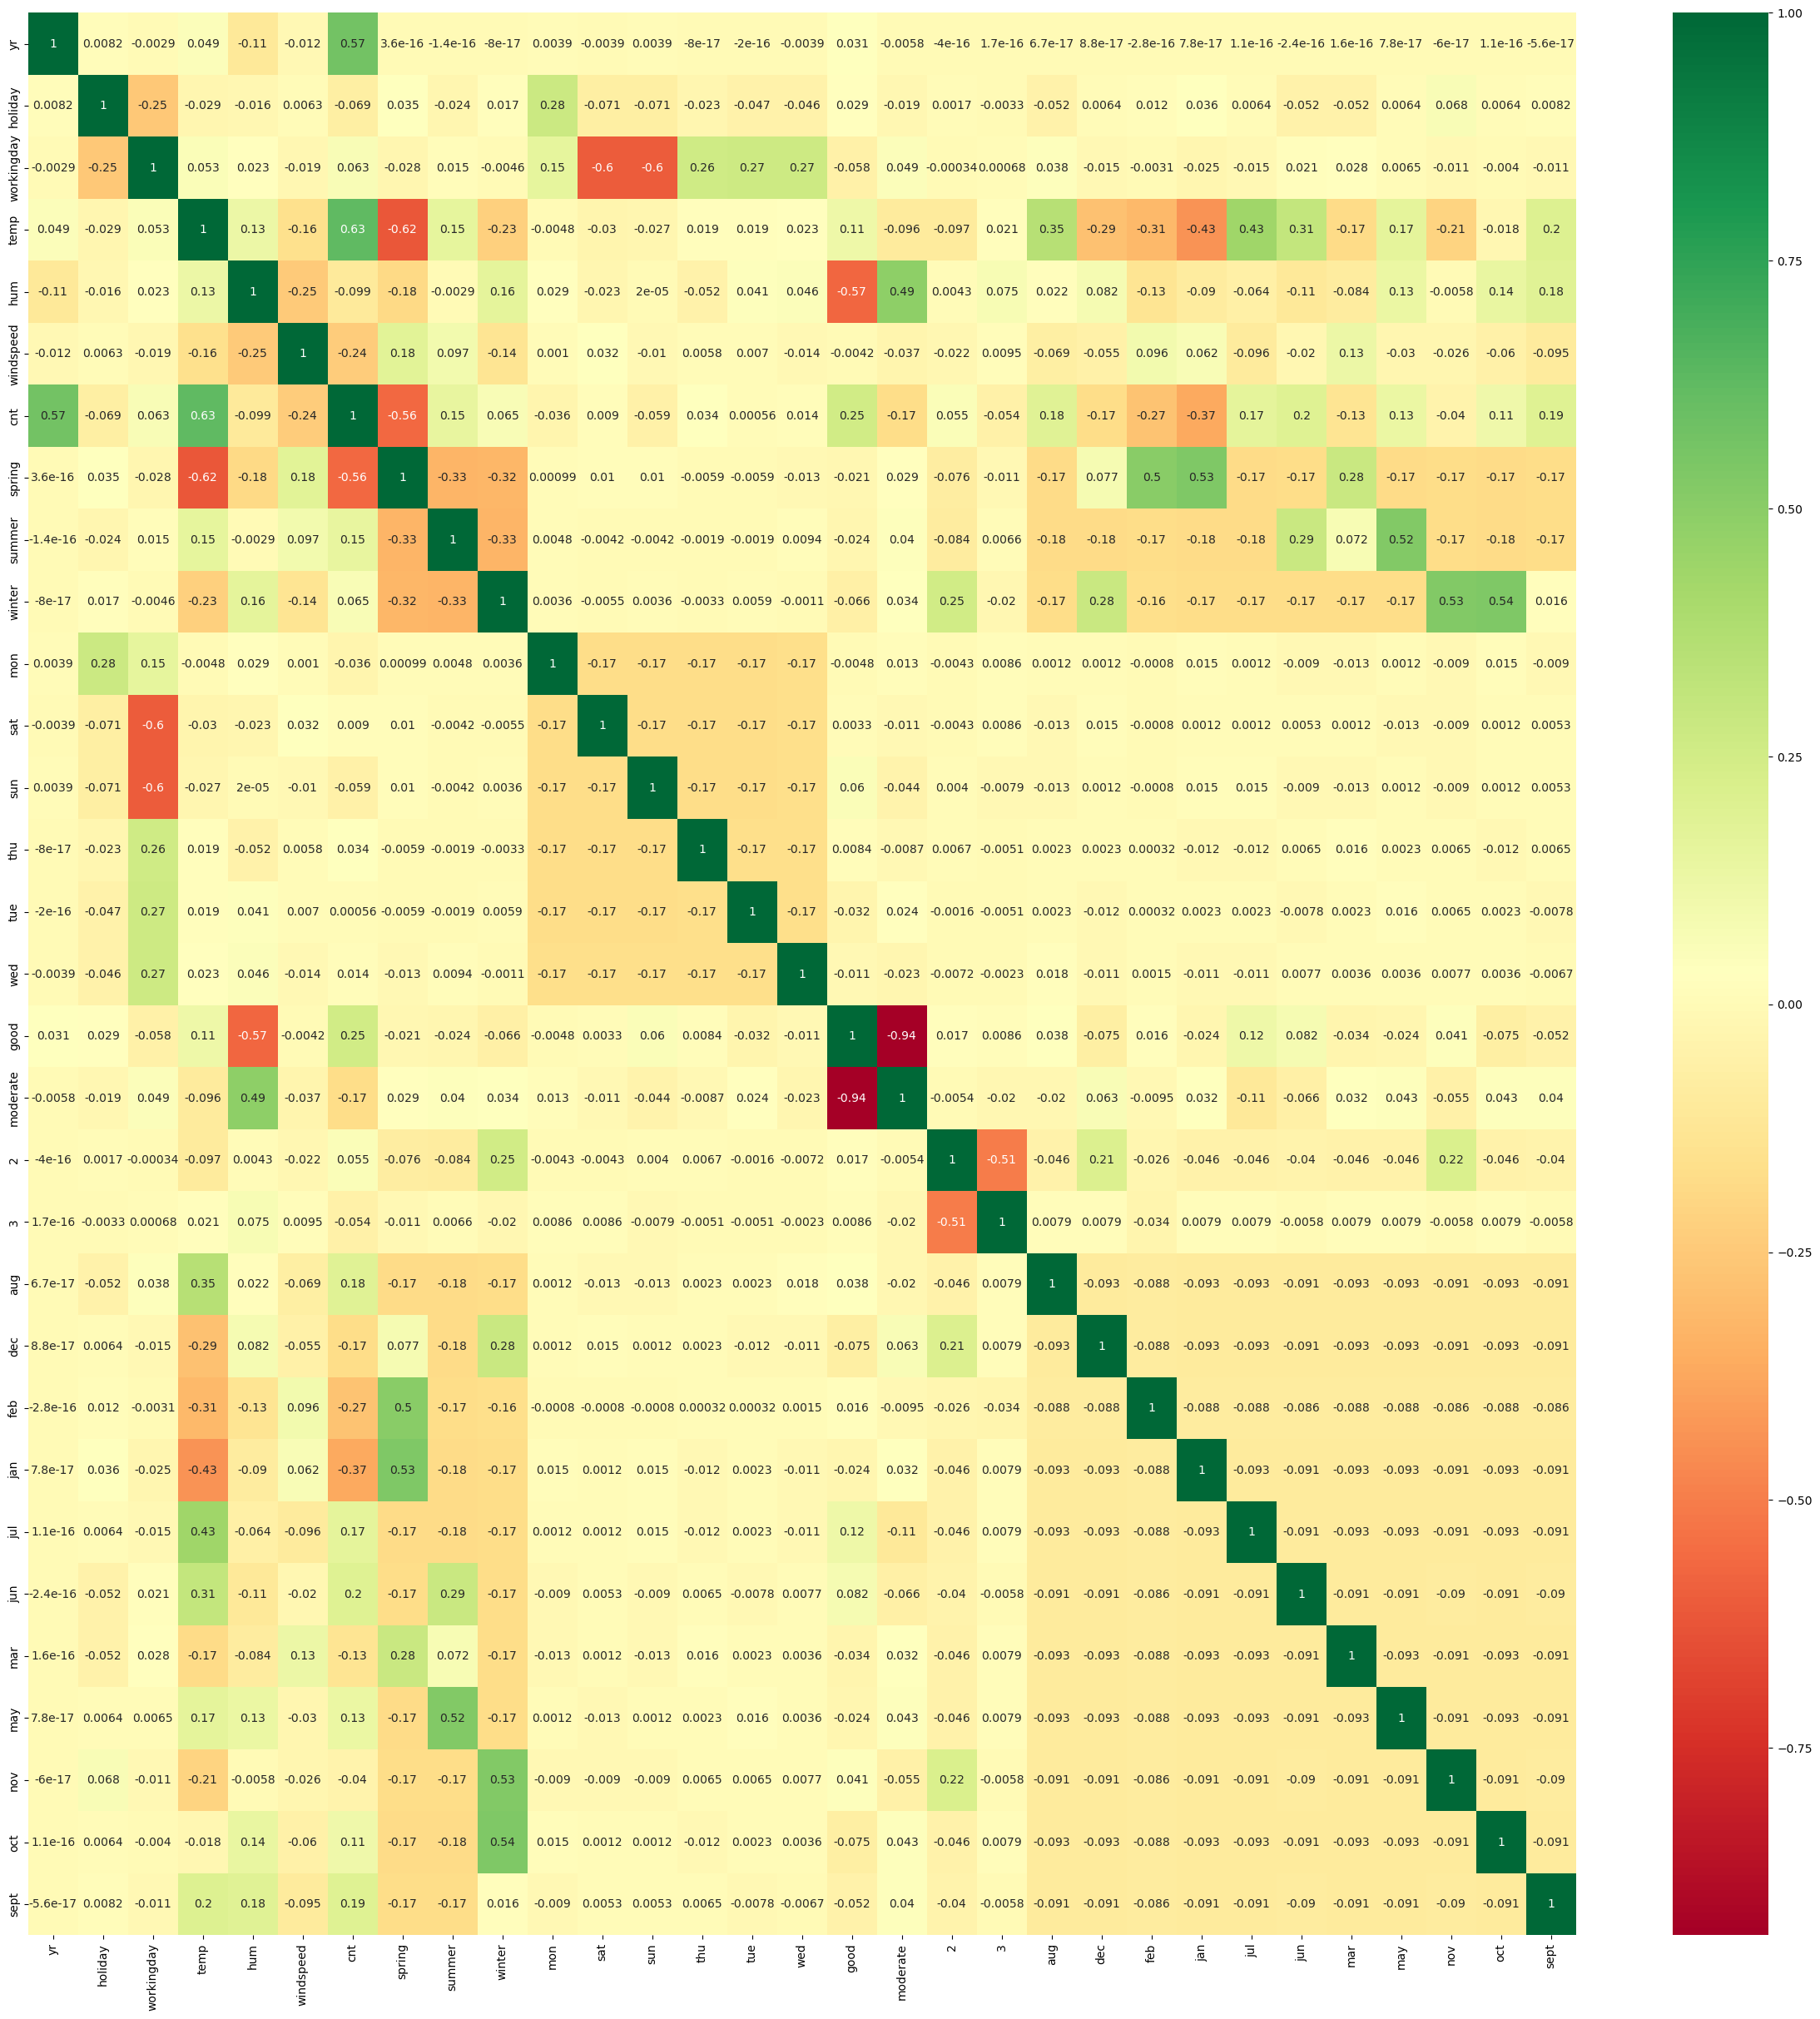

In [34]:
# Correlation diagram
plt.figure(figsize=(30,30))
sns.heatmap(final_ds.corr(),annot=True, cmap="RdYlGn")
plt.show()

# Step 5 - Train Test Split

In [35]:
X=final_ds.drop(["cnt"], axis=1)
y=final_ds["cnt"]

In [36]:
X.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,mon,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,0,0,14.110847,80.5833,10.749882,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [37]:
# Convert all columns into string
X.columns = X.columns.astype(str)

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [39]:
X_train.shape

(584, 30)

# Step 6 - Standardization 

In [40]:
#z=x-xmean/sigma
X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,mon,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
367,0.972135,-0.167693,0.704687,-1.882464,-1.350708,2.234862,1.722701,-0.571588,-0.576856,-0.418032,...,-0.309065,-0.281685,3.230029,-0.285205,-0.288695,-0.315659,-0.309065,-0.29559,-0.318924,-0.29559
648,0.972135,-0.167693,0.704687,-0.306487,-1.192918,-0.119042,-0.579490,-0.571588,1.730567,-0.418032,...,-0.309065,-0.281685,-0.309065,-0.285205,-0.288695,-0.315659,-0.309065,-0.29559,3.130177,-0.29559
44,-1.026903,-0.167693,0.704687,-0.417082,-1.818132,2.902856,1.722701,-0.571588,-0.576856,2.388067,...,-0.309065,3.543988,-0.309065,-0.285205,-0.288695,-0.315659,-0.309065,-0.29559,-0.318924,-0.29559
705,0.972135,-0.167693,0.704687,-0.937801,0.956630,-0.771166,-0.579490,-0.571588,1.730567,-0.418032,...,3.230029,-0.281685,-0.309065,-0.285205,-0.288695,-0.315659,-0.309065,-0.29559,-0.318924,-0.29559
379,0.972135,-0.167693,-1.416639,-1.790299,-1.508497,0.771778,1.722701,-0.571588,-0.576856,-0.418032,...,-0.309065,-0.281685,3.230029,-0.285205,-0.288695,-0.315659,-0.309065,-0.29559,-0.318924,-0.29559


# Step 7 - Modeling

### Feature Selection

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=12)

selector=selector.fit(X_train,y_train)
selector.support_

array([ True,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True])

In [42]:
# Selected columns
selected_features=X_train.columns[selector.support_]
selected_features

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'summer', 'winter',
       'sat', 'sun', 'good', 'moderate', 'sept'],
      dtype='object')

In [43]:
# Not selected columns
X_train.columns[~selector.support_]

Index(['hum', 'spring', 'mon', 'thu', 'tue', 'wed', '2', '3', 'aug', 'dec',
       'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct'],
      dtype='object')

In [44]:
#List of variables selected in top 15 list

list(zip(X_train.columns,selector.support_,selector.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', False, 2),
 ('windspeed', True, 1),
 ('spring', False, 3),
 ('summer', True, 1),
 ('winter', True, 1),
 ('mon', False, 10),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 17),
 ('tue', False, 11),
 ('wed', False, 18),
 ('good', True, 1),
 ('moderate', True, 1),
 ('2', False, 4),
 ('3', False, 13),
 ('aug', False, 14),
 ('dec', False, 6),
 ('feb', False, 9),
 ('jan', False, 7),
 ('jul', False, 8),
 ('jun', False, 16),
 ('mar', False, 19),
 ('may', False, 15),
 ('nov', False, 5),
 ('oct', False, 12),
 ('sept', True, 1)]

In [45]:
X_train=X_train[selected_features]
X_test=X_test[selected_features]

In [46]:
import statsmodels.api as sm

X_train_sm=sm.add_constant(X_train)#X_train_sm["const"]=1
X_test_sm=sm.add_constant(X_test)
X_train_sm.head()

,const,yr,holiday,workingday,temp,windspeed,summer,winter,sat,sun,good,moderate,sept
367,1.0,0.972135,-0.167693,0.704687,-1.882464,2.234862,-0.571588,-0.576856,-0.420851,-0.426467,0.765475,-0.721070,-0.29559
648,1.0,0.972135,-0.167693,0.704687,-0.306487,-0.119042,-0.571588,1.730567,-0.420851,-0.426467,0.765475,-0.721070,-0.29559
44,1.0,-1.026903,-0.167693,0.704687,-0.417082,2.902856,-0.571588,-0.576856,-0.420851,-0.426467,0.765475,-0.721070,-0.29559
705,1.0,0.972135,-0.167693,0.704687,-0.937801,-0.771166,-0.571588,1.730567,-0.420851,-0.426467,-1.304142,1.384454,-0.29559
379,1.0,0.972135,-0.167693,-1.416639,-1.790299,0.771778,-0.571588,-0.576856,-0.420851,2.340831,0.765475,-0.721070,-0.29559


In [47]:
# Create First Model
model1=sm.OLS(y_train,X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     276.7
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          9.38e-221
Time:                        19:18:10   Log-Likelihood:                -4716.4
No. Observations:                 584   AIC:                             9457.
Df Residuals:                     572   BIC:                             9509.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671     32.542    138.443      0.000    4441.350    4569.184
yr           997.7683     33.093     30.151      0.000     932.771    1062.766
holiday    -5.816e+13   1.84e+15     -0.032      0.975   -3.67e+15    3.56e+15
workingday -1.678e+14   5.31e+15     -0.032      0.975   -1.06e+16    1.03e+16
temp        1106.4592     35.512     31.158      0.000    1036.710    1176.208
windspeed   -223.1761     34.001     -6.564      0.000    -289.957    -156.395
summer       340.2155     35.957      9.462      0.000     269.592     410.839
winter       519.0277     35.645     14.561      0.000     449.016     589.039
sat        -1.275e+14   4.03e+15     -0.032      0.975   -8.05e+15    7.79e+15
sun        -1.286e+14   4.07e+15     -0.032      0.975   -8.12e+15    7.87e+15
good        1234.5738     98.522     12.531      0.000    1041.065    1428.083
moderate     883.7257     98.337      8.987      0.000     690.579    1076.872
sept         219.7176     34.328      6.401      0.000     152.294     287.141
==============================================================================
Omnibus:                       75.367   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.874
Skew:                          -0.729   Prob(JB):                     3.17e-35
Kurtosis:                       5.099   Cond. No.                     3.49e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.6e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [48]:
# Generic function to calculate VIF of variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [49]:
calculateVIF(X_train_sm)

,Features,VIF
2,holiday,inf
3,workingday,inf
8,sat,inf
9,sun,inf
10,good,9.15
11,moderate,9.11
6,summer,1.20
4,temp,1.19
7,winter,1.19
12,sept,1.11


In [50]:
# holiday, workingday, sat and sun are having high VIF as well P value, so dropping holiday randomly
X_train_sm=X_train_sm.drop(['holiday'],axis=1)
X_test_sm=X_test_sm.drop(['holiday'],axis=1)

In [51]:
# Create Second Model
model2=sm.OLS(y_train,X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     276.9
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          8.07e-221
Time:                        19:18:10   Log-Likelihood:                -4716.3
No. Observations:                 584   AIC:                             9457.
Df Residuals:                     572   BIC:                             9509.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671     32.534    138.480      0.000    4441.367    4569.167
yr           997.9200     32.734     30.486      0.000     933.627    1062.213
workingday   465.0718     95.202      4.885      0.000     278.083     652.060
temp        1106.4735     35.499     31.169      0.000    1036.748    1176.199
windspeed   -223.1532     33.984     -6.566      0.000    -289.902    -156.405
summer       340.0751     35.672      9.533      0.000     270.011     410.139
winter       518.9255     35.489     14.622      0.000     449.221     588.630
sat          387.3851     76.867      5.040      0.000     236.409     538.361
sun          190.0141     77.428      2.454      0.014      37.936     342.093
good        1234.5754     98.496     12.534      0.000    1041.118    1428.033
moderate     883.6559     98.287      8.991      0.000     690.609    1076.703
sept         219.6526     34.257      6.412      0.000     152.368     286.937
==============================================================================
Omnibus:                       74.982   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.532
Skew:                          -0.722   Prob(JB):                     2.28e-35
Kurtosis:                       5.114   Cond. No.                         6.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
calculateVIF(X_train_sm)

,Features,VIF
9,good,9.15
10,moderate,9.11
2,workingday,8.55
8,sun,5.65
7,sat,5.57
5,summer,1.20
3,temp,1.19
6,winter,1.19
11,sept,1.11
4,windspeed,1.09


In [53]:
# Remove good as it is having high VIF 9.15
X_train_sm=X_train_sm.drop(['good'],axis=1)
X_test_sm=X_test_sm.drop(['good'],axis=1)

In [54]:
# Create Third Model
model3=sm.OLS(y_train,X_train_sm)
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     227.0
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          5.73e-192
Time:                        19:18:10   Log-Likelihood:                -4787.1
No. Observations:                 584   AIC:                             9596.
Df Residuals:                     573   BIC:                             9644.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671     36.699    122.763      0.000    4433.186    4577.348
yr          1016.2827     36.888     27.551      0.000     943.831    1088.734
workingday   412.1444    107.285      3.842      0.000     201.425     622.864
temp        1117.3599     40.032     27.911      0.000    1038.732    1195.988
windspeed   -267.1715     38.129     -7.007      0.000    -342.062    -192.281
summer       342.2094     40.238      8.505      0.000     263.177     421.242
winter       474.6767     39.834     11.916      0.000     396.439     552.915
sat          348.6849     86.638      4.025      0.000     178.519     518.851
sun          170.5850     87.324      1.953      0.051      -0.928     342.098
moderate    -276.8985     37.196     -7.444      0.000    -349.955    -203.842
sept         199.3051     38.599      5.163      0.000     123.492     275.118
==============================================================================
Omnibus:                      157.411   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              524.522
Skew:                          -1.247   Prob(JB):                    1.26e-114
Kurtosis:                       6.916   Cond. No.                         5.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
calculateVIF(X_train_sm)

,Features,VIF
2,workingday,8.53
8,sun,5.65
7,sat,5.56
5,summer,1.20
3,temp,1.19
6,winter,1.18
10,sept,1.10
4,windspeed,1.08
9,moderate,1.03
1,yr,1.01


In [56]:
# Remove sun as it is having p and VIF value 0.051 and 5.65
X_train_sm=X_train_sm.drop(['sun'],axis=1)
X_test_sm=X_test_sm.drop(['sun'],axis=1)

In [57]:
# Create Fourth Model
model4=sm.OLS(y_train,X_train_sm)
res4=model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     250.6
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          2.34e-192
Time:                        19:18:10   Log-Likelihood:                -4789.1
No. Observations:                 584   AIC:                             9598.
Df Residuals:                     574   BIC:                             9642.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671     36.789    122.463      0.000    4433.010    4577.524
yr          1014.5944     36.968     27.445      0.000     941.986    1087.203
workingday   222.7829     46.086      4.834      0.000     132.266     313.300
temp        1120.7461     40.093     27.954      0.000    1042.000    1199.492
windspeed   -269.3547     38.206     -7.050      0.000    -344.396    -194.313
summer       346.1573     40.286      8.593      0.000     267.031     425.283
winter       474.9764     39.931     11.895      0.000     396.547     553.405
sat          205.1494     46.017      4.458      0.000     114.767     295.532
moderate    -275.9208     37.283     -7.401      0.000    -349.149    -202.692
sept         196.6172     38.669      5.085      0.000     120.667     272.568
==============================================================================
Omnibus:                      157.568   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              518.928
Skew:                          -1.253   Prob(JB):                    2.07e-113
Kurtosis:                       6.879   Cond. No.                         2.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
calculateVIF(X_train_sm)

,Features,VIF
2,workingday,1.57
7,sat,1.56
5,summer,1.20
3,temp,1.19
6,winter,1.18
9,sept,1.10
4,windspeed,1.08
8,moderate,1.03
1,yr,1.01
0,const,1.00


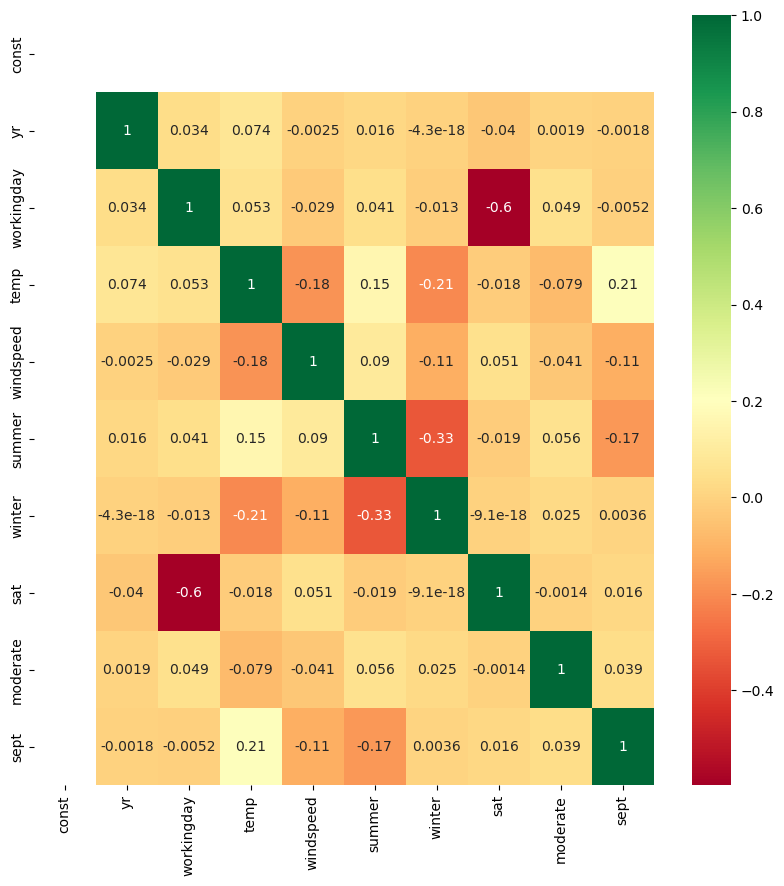

In [59]:
# Correlation diagram
plt.figure(figsize=(10,10))
sns.heatmap(X_train_sm.corr(),annot=True, cmap="RdYlGn")
plt.show()

In [60]:
# Remove workingday as it is having high innercorrelation with sat
X_train_sm=X_train_sm.drop(['workingday'],axis=1)
X_test_sm=X_test_sm.drop(['workingday'],axis=1)

In [61]:
# Create Fifth Model
model5=sm.OLS(y_train,X_train_sm)
res5=model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     268.6
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          1.25e-188
Time:                        19:18:10   Log-Likelihood:                -4800.7
No. Observations:                 584   AIC:                             9619.
Df Residuals:                     575   BIC:                             9659.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671     37.498    120.148      0.000    4431.618    4578.916
yr          1015.9510     37.679     26.963      0.000     941.946    1089.956
temp        1130.9241     40.809     27.713      0.000    1050.772    1211.076
windspeed   -267.1123     38.940     -6.860      0.000    -343.594    -190.631
summer       350.4357     41.052      8.536      0.000     269.805     431.066
winter       475.6786     40.700     11.687      0.000     395.739     555.618
sat           72.3309     37.626      1.922      0.055      -1.570     146.232
moderate    -264.4538     37.925     -6.973      0.000    -338.941    -189.966
sept         196.0315     39.414      4.974      0.000     118.619     273.444
==============================================================================
Omnibus:                      150.445   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              451.491
Skew:                          -1.229   Prob(JB):                     9.12e-99
Kurtosis:                       6.537   Cond. No.                         1.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
calculateVIF(X_train_sm)

,Features,VIF
4,summer,1.20
2,temp,1.18
5,winter,1.18
8,sept,1.10
3,windspeed,1.08
7,moderate,1.02
1,yr,1.01
6,sat,1.01
0,const,1.00


In [63]:
# Remove sat as it is having high p value 0.055
X_train_sm=X_train_sm.drop(['sat'],axis=1)
X_test_sm=X_test_sm.drop(['sat'],axis=1)

In [64]:
# Create sixth Model
model6=sm.OLS(y_train,X_train_sm)
res6=model6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     305.0
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          4.35e-189
Time:                        19:18:10   Log-Likelihood:                -4802.6
No. Observations:                 584   AIC:                             9621.
Df Residuals:                     576   BIC:                             9656.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671     37.585    119.868      0.000    4431.446    4579.088
yr          1013.1111     37.738     26.846      0.000     938.990    1087.232
temp        1130.4007     40.903     27.636      0.000    1050.063    1210.738
windspeed   -263.2620     38.979     -6.754      0.000    -339.820    -186.704
summer       349.0513     41.142      8.484      0.000     268.245     429.858
winter       475.5399     40.795     11.657      0.000     395.414     555.665
moderate    -264.4071     38.013     -6.956      0.000    -339.069    -189.746
sept         197.5104     39.499      5.000      0.000     119.932     275.089
==============================================================================
Omnibus:                      147.889   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              459.110
Skew:                          -1.195   Prob(JB):                    2.02e-100
Kurtosis:                       6.627   Cond. No.                         1.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
calculateVIF(X_train_sm)

,Features,VIF
4,summer,1.20
2,temp,1.18
5,winter,1.18
7,sept,1.10
3,windspeed,1.07
6,moderate,1.02
1,yr,1.01
0,const,1.00


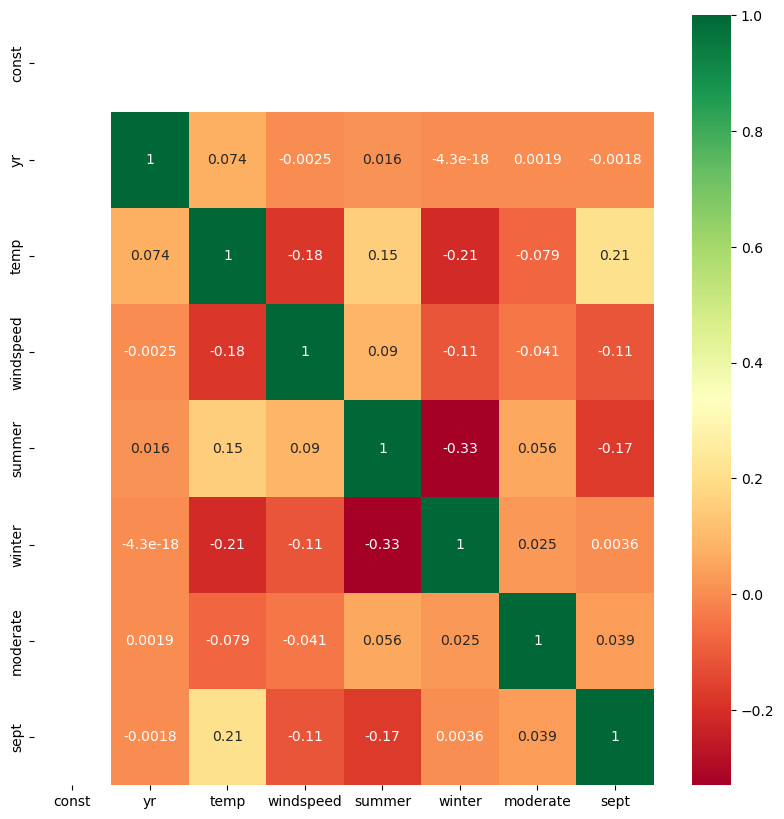

In [66]:
# Correlation diagram
plt.figure(figsize=(10,10))
sns.heatmap(X_train_sm.corr(),annot=True, cmap="RdYlGn")
plt.show()

### There is no inter colinearity between the variables

# Step 8 - Residual Analysis of the train data and validation

In [67]:
# Get the predicted train data from the model
y_train_pred = res6.predict(X_train_sm)

In [68]:
# Get the resedual
res = y_train - y_train_pred

Text(0.5, 0, 'Errors')

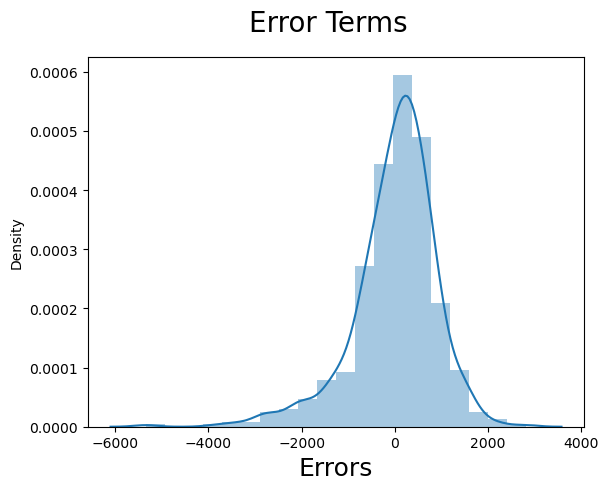

In [69]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot(res, bins=20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

# Step 9 - Prediction and Evaluation on the Test Set

In [70]:
# Check the X_test
X_test_sm.head()

,const,yr,temp,windspeed,summer,winter,moderate,sept
184,1.0,-0.892733,1.101193,-1.429568,-0.612188,-0.527995,1.469362,-0.311568
535,1.0,1.112483,1.393399,-0.999233,1.622298,-0.527995,-0.675906,-0.311568
299,1.0,-0.892733,-0.242093,0.118115,-0.612188,1.880984,1.469362,-0.311568
221,1.0,-0.892733,1.310535,0.151322,-0.612188,-0.527995,-0.675906,-0.311568
152,1.0,-0.892733,1.040132,1.376185,1.622298,-0.527995,-0.675906,-0.311568


In [71]:
# get the predicted test data
y_test_pred = res6.predict(X_test_sm)

Text(0, 0.5, 'y_pred')

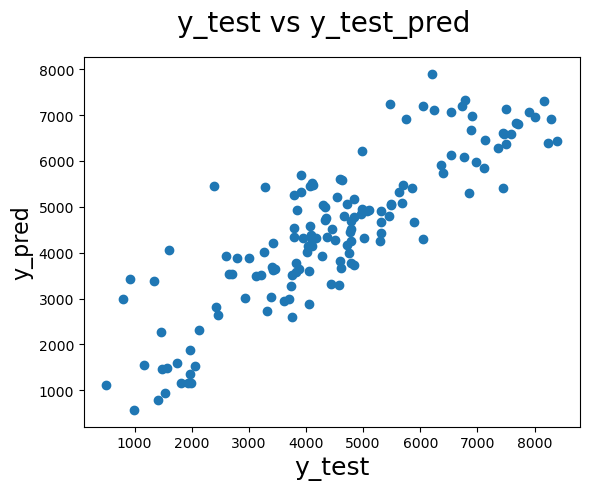

In [72]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [73]:
from sklearn.metrics import r2_score

r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.7394238213590385

In [74]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
adjusted_r2

0.7159

In [75]:
X_train_sm.columns

Index(['const', 'yr', 'temp', 'windspeed', 'summer', 'winter', 'moderate',
       'sept'],
      dtype='object')

# Step 10 - Conclusion

Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.788
- Test dataset R^2           : 0.739
- Train dataset Adjusted R^2 : 0.785  
- Test dataset Adjusted R^2  : 0.716

Most relevant varibales need to be consider for prediction are
1. yr
2. temp
3. weathersit like - moderate
4. windspeed
5. season like - summer, winter
6. month like - sep